# Тесты

## Создание данных

In [1]:
import sys
sys.path.append('../')
import action
import extract

handle = open("examples.txt", "r")
text = handle.read()
handle.close()
list_, N = [0], 0
for i in range(len(text)):
    if text[i] == '.':
        last = i
    N += 1
    if N > 10000:
        list_.append(last)
        N = 0
root_list = []
for i in range(len(list_) - 1):
    root_list = root_list + action.construct_tree(text[list_[i] : list_[i + 1]])
     
df = extract.extract(root_list)
print(len(df))

/home/ased/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ased/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


3901


## Извлечение признаков

In [4]:
import numpy as np
list_ = [[] for i in range(len(df.columns.values.tolist()))]
for j in range(len(df.columns.values.tolist())):
    for i in df[df.columns.values[j]]:
        if not i in list_[j]:
            list_[j].append(i)

N = len(list_[0]) + len(list_[1])

array = None
for i in range(len(df)):
    x = [0] * N
    sum_ = 0
    for j in range(len(df.columns.values.tolist())):
        x[list_[j].index(df[df.columns.values[j]][i]) + sum_] = 1
        sum_ += len(list_[j])
    if array is None:
        array = np.array(x)
    else:
        array = np.vstack((array, x))
print(array.shape)


(3901, 68)


## Потеря дисперсии при PCA

<IPython.core.display.Javascript object>


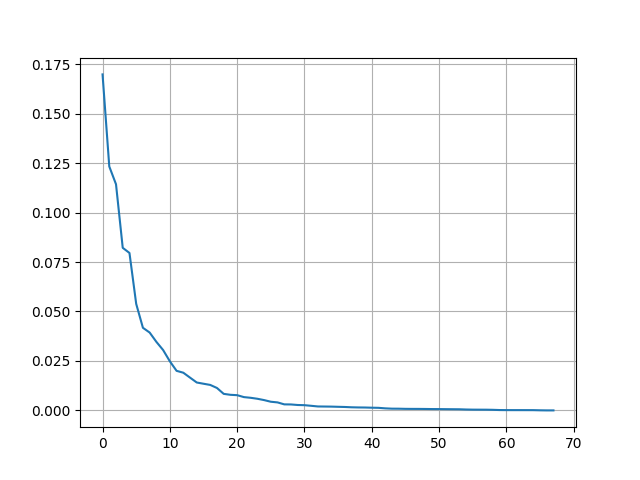

In [15]:
from sklearn.decomposition import PCA
data = array.copy()
pca = PCA(n_components = 68)
pca.fit(data)
ratio = pca.explained_variance_ratio_
import matplotlib.pyplot as plt
% matplotlib notebook
plt.plot([i for i in range(len(ratio))], ratio)
plt.grid()

## Визуализация

### На плоскости

(3901, 2)


<IPython.core.display.Javascript object>


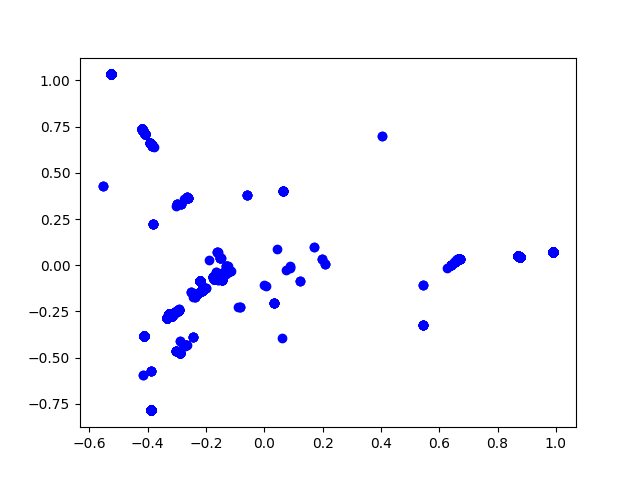

In [29]:
% matplotlib notebook
pca = PCA(n_components = 2)
pca.fit(data)
data =pca.transform(data)
print(data.shape)
plt.plot([data[i][0] for i in range(data.shape[0])],
         [data[i][1] for i in range(data.shape[0])],
         'bo')

### В пространстве

<IPython.core.display.Javascript object>


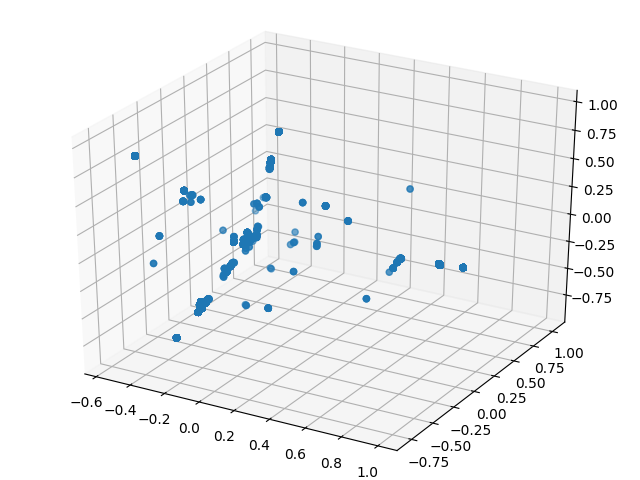

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
pca = PCA(n_components = 3)
data = array.copy()
pca.fit(data)
data =pca.transform(data)
fig = plt.figure()
ax = Axes3D(fig)
xs = [data[i][0] for i in range(data.shape[0])]
ys = [data[i][1] for i in range(data.shape[0])]
zs = [data[i][2] for i in range(data.shape[0])]
ax.scatter(xs, ys, zs)

## Кластеризация

In [71]:
from sklearn.cluster import AgglomerativeClustering as AC
data = array.copy()
pca = PCA(n_components = 10)
X = pca.fit_transform(data)
ac = AC(5, linkage = 'complete').fit(X)
y = ac.labels_

0 1233


<IPython.core.display.Javascript object>


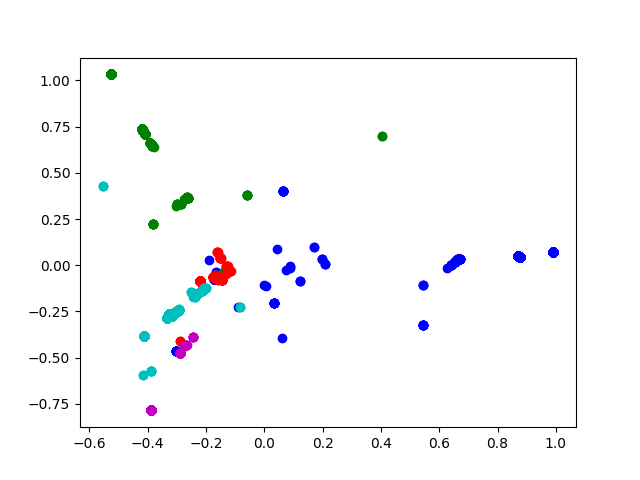

1 814
2 419
3 971
4 464


In [72]:
% matplotlib notebook
data = array.copy()
pca = PCA(n_components = 2)
pca.fit(data)
data =pca.transform(data)
colors = ['bo', 'go', 'ro', 'co', 'mo']
for j in range(5):
    print(j, len([data[i][0] for i in range(data.shape[0]) if y[i] == j]))
    plt.plot([data[i][0] for i in range(data.shape[0]) if y[i] == j],
             [data[i][1] for i in range(data.shape[0]) if y[i] == j], colors[j])

<IPython.core.display.Javascript object>


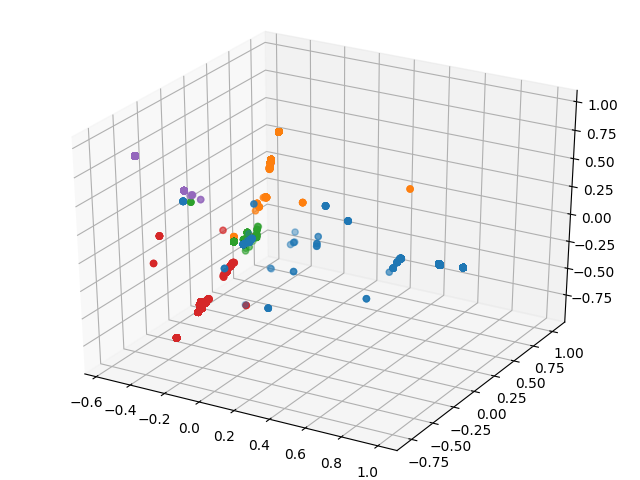

In [73]:
% matplotlib notebook
pca = PCA(n_components = 3)
data = array.copy()
pca.fit(data)
data =pca.transform(data)
fig = plt.figure()
ax = Axes3D(fig)
for j in range(6):
    xs = [data[i][0] for i in range(data.shape[0]) if y[i]== j]
    ys = [data[i][1] for i in range(data.shape[0]) if y[i]== j]
    zs = [data[i][2] for i in range(data.shape[0]) if y[i]== j]
    ax.scatter(xs, ys, zs)